In [27]:
from osgeo import gdal, ogr
import geopandas as gpd
import matplotlib.pyplot as plt

import rasterio
from rasterio.plot import show
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

import numpy as np
from sklearn.cluster import KMeans
#import gdal
import pandas as pd

In [45]:
#set path to image
path="mask_spam2017V2r1_SSA_A_COCO_A.tif"
path2="spam2017V2r1_SSA_A_COCO_A.tif"

In [50]:
#Alternatively Open IMage with rasterio
dataset_rasterio = rasterio.open(path)
dataset_rasterio2 = rasterio.open(path2)

In [63]:
def get_raster_specs(src):
    specs = {
        'crs': src.crs,
        'extent': src.bounds,
        'pixel_size': src.res,
        'width': src.width,
        'height': src.height,
        'count': src.count,
        "Driver:": src.driver,
        "Mode:": src.mode,
        "Is closed?": src.closed,
        "Data types:": src.dtypes,
        "Transform:": src.transform,
        "Block shapes:": src.block_shapes,
        "Nodata values:": src.nodata,
        "Indexes:": src.indexes,
        "Descriptions:": src.descriptions,
        "Tags:": src.tags(),
        "Color interpretation:": src.colorinterp,
        "CRS:": src.crs,
        #"CRS WKT:": src.crs_wkt,
        #"CRS Proj4:": src.crs_proj,
        "Transform:": src.transform
    }
    return specs

def get_proj(src):
    specs = {
        'crs': src.crs,
    }
    return specs


In [52]:

raster_specs = get_raster_specs(dataset_rasterio)
print("Raster specifications:")
print(raster_specs)

Raster specifications:
{'crs': CRS.from_epsg(4326), 'extent': BoundingBox(left=-8.584018999999984, bottom=4.417008999999993, right=-2.500709999999997, top=10.666984), 'pixel_size': (0.08333299999999981, 0.08333300000000009), 'width': 73, 'height': 75, 'count': 1, 'Driver:': 'GTiff', 'Mode:': 'r', 'Is closed?': False, 'Data types:': ('float32',), 'Transform:': Affine(0.08333299999999981, 0.0, -8.584018999999984,
       0.0, -0.08333300000000009, 10.666984), 'Block shapes:': [(28, 73)], 'Nodata values:': -1.0, 'Indexes:': (1,), 'Descriptions:': (None,), 'Tags:': {'AREA_OR_POINT': 'Area'}, 'Color interpretation:': (<ColorInterp.gray: 1>,), 'CRS:': CRS.from_epsg(4326)}


In [65]:
raster_specs = get_proj(dataset_rasterio2)
print("Raster specifications:")
print(raster_specs)

Raster specifications:
{'crs': CRS.from_epsg(4326)}


In [68]:


def transform_raster_to_epsg3857(input_raster, output_raster):

    # Open the input raster dataset
    with rasterio.open(input_raster_path) as src:
        # Calculate the transform and dimensions for reprojecting
        dst_crs = 'EPSG:3857'  # Target CRS
        transform, width, height = calculate_default_transform(src.crs, dst_crs, src.width, src.height, *src.bounds)

        # Create the output raster dataset
        kwargs = src.meta.copy()
        kwargs.update({
            'crs': dst_crs,
            'transform': transform,
            'width': width,
            'height': height
        })

        # Reproject the raster image to EPSG:3857
        with rasterio.open(output_raster_path, 'w', **kwargs) as dst:
            for i in range(1, src.count + 1):
                reproject(
                    source=rasterio.band(src, i),
                    destination=rasterio.band(dst, i),
                    src_transform=src.transform,
                    src_crs=src.crs,
                    dst_transform=transform,
                    dst_crs=dst_crs,
                    resampling=Resampling.nearest
                )
    return kwargs


In [69]:
# Example usage
input_raster_path = path 
output_raster_path = 'output_raster_epsg3857.tif'  
transform_raster_to_epsg3857(input_raster_path, output_raster_path)

{'driver': 'GTiff',
 'dtype': 'float32',
 'nodata': -1.0,
 'width': 73,
 'height': 75,
 'count': 1,
 'crs': 'EPSG:3857',
 'transform': Affine(9320.723701722343, 0.0, -955568.6240397836,
        0.0, -9320.723701722343, 1194362.885280542)}

In [83]:
import rasterio
from rasterio.warp import calculate_default_transform, reproject, Resampling

def transform_raster_to_epsg3857(input_raster):

    # Open the input raster dataset
    with rasterio.open(input_raster) as src:
        # Calculate the transform and dimensions for reprojecting
        dst_crs = 'EPSG:3857'  # Target CRS
        transform, width, height = calculate_default_transform(src.crs, dst_crs, src.width, src.height, *src.bounds)

        # Reproject the raster image to EPSG:3857
        reprojected_data = []
        for i in range(1, src.count + 1):
            data = src.read(i, out_shape=(src.count, height, width), resampling=Resampling.nearest)
            reprojected_data.append(data)
        reprojected_data = tuple(reprojected_data)

        # Update metadata for the reprojected raster image
        reprojected_meta = src.meta.copy()
        reprojected_meta.update({
            'crs': dst_crs,
            'transform': transform,
            'width': width,
            'height': height
        })

    return reprojected_data, reprojected_meta



In [84]:
reprojected_data, reprojected_meta = transform_raster_to_epsg3857(path)



In [85]:
reprojected_data

(array([[-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        ...,
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.],
        [-1., -1., -1., ..., -1., -1., -1.]], dtype=float32),)

TypeError: Invalid shape (1, 75, 73) for image data

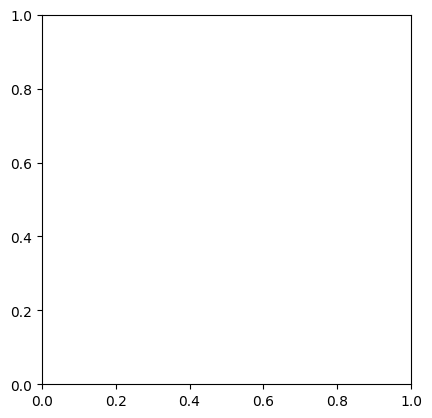

In [86]:
# Read the raster data
data = reprojected_raster

# Plot the raster data using matplotlib
plt.imshow(data, cmap='viridis')
plt.title('COCO_AREA')
plt.colorbar(label='AREA')
plt.show()

In [75]:
import numpy as np
import rasterio
from rasterio.transform import from_origin

def transform_raster_to_epsg3857(input_raster):

    # Open the input raster dataset
    with rasterio.open(input_raster) as src:
        # Calculate the transform and dimensions for reprojecting
        dst_crs = 'EPSG:3857'  # Target CRS
        transform, width, height = rasterio.warp.calculate_default_transform(
            src.crs, dst_crs, src.width, src.height, *src.bounds
        )

        # Reproject the raster image to EPSG:3857
        reprojected_data = []
        for i in range(1, src.count + 1):
            data = src.read(i, out_shape=(height, width), resampling=rasterio.enums.Resampling.nearest)
            reprojected_data.append(data)

    # Create the profile for the reprojected raster dataset
    reprojected_profile = {
        'driver': 'GTiff',
        'count': len(reprojected_data),
        'dtype': np.uint8,  # Adjust the dtype if necessary
        'width': width,
        'height': height,
        'transform': transform,
        'crs': dst_crs
    }

    # Create a new raster dataset
    with rasterio.open('reprojected_raster.tif', 'w', **reprojected_profile) as dst:
        for i, data in enumerate(reprojected_data, start=1):
            dst.write(data, i)

    # Read the reprojected raster image
    with rasterio.open('reprojected_raster.tif') as reprojected_src:
        reprojected_raster = reprojected_src.read()

    return reprojected_raster



In [76]:

reprojected_raster = transform_raster_to_epsg3857(path)


TypeError: Invalid shape (1, 75, 73) for image data

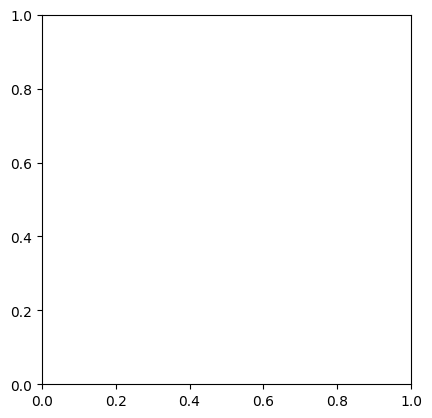

In [87]:
# Read the raster data
data = reprojected_raster

# Plot the raster data using matplotlib
plt.imshow(data, cmap='viridis')
plt.title('COCO_AREA')
plt.colorbar(label='AREA')
plt.show()


In [77]:
show(reprojected_data, cmap='viridis', title='COCO_AREA')
plt.show()


AttributeError: 'numpy.ndarray' object has no attribute 'read'

In [59]:
#Alternatively Open IMage with rasterio
dataset_rasterio = rasterio.open(path)

In [54]:

gdf = gpd.read_file(path2)

DriverError: 'spam2017V2r1_SSA_A_COCO_A.tif' not recognized as a supported file format.

In [34]:

def read_and_reproject(input_raster_path):

    # Read the input raster dataset
    gdf = gpd.read_file(input_raster_path)

    # Reproject the raster image to EPSG:3857
    gdf = gdf.to_crs(epsg=3857)

    return gdf



In [44]:
gdalinfo "mask_spam2017V2r1_SSA_A_COCO_A.tif"


SyntaxError: invalid syntax (1728996935.py, line 1)

In [36]:

transformed_gdf = read_and_reproject(path)


DriverError: 'mask_spam2017V2r1_SSA_A_COCO_A.tif' not recognized as a supported file format.

In [95]:

source_ds = gdal.Open(path)

source_crs = source_ds.GetProjection()

source_crs

'GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AXIS["Latitude",NORTH],AXIS["Longitude",EAST],AUTHORITY["EPSG","4326"]]'

In [110]:
from osgeo import gdal, osr

def transform_raster(input_raster_path, output_raster_path, epsg_from=4326, epsg_to=3857):

    # Open the input raster dataset
    source_ds = gdal.Open(input_raster_path)

    # Define source and target coordinate reference systems
    #source_crs = source_ds.GetProjection()
    #source_crs = epsg_from
    dest_crs = osr.SpatialReference()
    dest_crs.ImportFromEPSG(3857)
    
    #osng = osr.SpatialReference ()
    #osng.ImportFromEPSG ( epsg_to )
    source_crs = osr.SpatialReference ()
    source_crs.ImportFromEPSG ( epsg_from )
    

    # Perform the transformation
    transform = gdal.Transformer(source_ds, None, ['METHOD=RPC'])
    transform.SetSrcSpatialRef(source_crs)
    transform.SetDstSpatialRef(source_crs)

    # Get the output dimensions
    width = source_ds.RasterXSize
    height = source_ds.RasterYSize

    # Create the output raster dataset
    dest_ds = gdal.GetDriverByName('GTiff').Create(output_raster_path, width, height, source_ds.RasterCount, gdal.GDT_Float32)
    dest_ds.SetProjection(dest_crs.ExportToWkt())
    dest_ds.SetGeoTransform(source_ds.GetGeoTransform())

    # Perform the transformation
    transform.TransformRect(0, 0, width, height, source_ds.GetRasterBand(1), dest_ds.GetRasterBand(1))

    # Close the datasets
    src_ds = None
    dst_ds = None



In [112]:

output_raster_path = 'transformed_raster_epsg3857.tif'

# Transform the raster image to EPSG:3857 using GDAL
transform_raster(path, output_raster_path,4326, 3857)


TypeError: Transformer() takes exactly 3 arguments (2 given)

In [115]:
from osgeo import gdal

# Set the paths to your input and output files
input_file = path
output_file = 'output.tif'

# Set your desired warp options as a list of strings
warp_options = ['-t_srs', 'EPSG:4326']  # For example, reprojecting to EPSG:4326

# Perform the warp operation
gdal.Warp(output_file, input_file, options=warp_options)

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fb7c4079080> >

In [118]:
test = gdal.Warp(output_file, path, dstSRS='EPSG:3857')
test

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fb7c3f55320> >

In [123]:
#source_ds = gdal.Open(test)
source_ds

<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7fb7c3eaff00> >

In [121]:

raster_specs = get_raster_specs(test)
print("Raster specifications:")
print(raster_specs)

AttributeError: 'Dataset' object has no attribute 'crs'

In [89]:
source_ds = gdal.Open(path)


In [90]:
def reproject_dataset ( dataset, \
            pixel_spacing=5000., epsg_from=4326, epsg_to=3857 ):
    """
    A sample function to reproject and resample a GDAL dataset from within 
    Python. The idea here is to reproject from one system to another, as well
    as to change the pixel size. The procedure is slightly long-winded, but
    goes like this:
    
    1. Set up the two Spatial Reference systems.
    2. Open the original dataset, and get the geotransform
    3. Calculate bounds of new geotransform by projecting the UL corners 
    4. Calculate the number of pixels with the new projection & spacing
    5. Create an in-memory raster dataset
    6. Perform the projection
    """
    # Define the UK OSNG, see <http://spatialreference.org/ref/epsg/27700/>
    osng = osr.SpatialReference ()
    osng.ImportFromEPSG ( epsg_to )
    wgs84 = osr.SpatialReference ()
    wgs84.ImportFromEPSG ( epsg_from )
    tx = osr.CoordinateTransformation ( wgs84, osng )
    # Up to here, all  the projection have been defined, as well as a 
    # transformation from the from to the  to :)
    # We now open the dataset
    g = gdal.Open (dataset)
    # Get the Geotransform vector
    geo_t = g.GetGeoTransform ()
    x_size = g.RasterXSize # Raster xsize
    y_size = g.RasterYSize # Raster ysize
    # Work out the boundaries of the new dataset in the target projection
    (ulx, uly, ulz ) = tx.TransformPoint( geo_t[0], geo_t[3])
    (lrx, lry, lrz ) = tx.TransformPoint( geo_t[0] + geo_t[1]*x_size, \
                                          geo_t[3] + geo_t[5]*y_size )
    # See how using 27700 and WGS84 introduces a z-value!
    # Now, we create an in-memory raster
    mem_drv = gdal.GetDriverByName( 'MEM' )
    # The size of the raster is given the new projection and pixel spacing
    # Using the values we calculated above. Also, setting it to store one band
    # and to use Float32 data type.
    dest = mem_drv.Create('', int((lrx - ulx)/pixel_spacing), \
            int((uly - lry)/pixel_spacing), 1, gdal.GDT_Float32)
    # Calculate the new geotransform
    new_geo = ( ulx, pixel_spacing, geo_t[2], \
                uly, geo_t[4], -pixel_spacing )
    # Set the geotransform
    dest.SetGeoTransform( new_geo )
    dest.SetProjection ( osng.ExportToWkt() )
    # Perform the projection/resampling 
    res = gdal.ReprojectImage( g, dest, \
                wgs84.ExportToWkt(), osng.ExportToWkt(), \
                gdal.GRA_Bilinear )
    return dest
    

In [92]:
test = reproject_dataset(path, epsg_from=4326, epsg_to=3857)

ERROR 1: Attempt to create -139x-136 dataset is illegal,sizes must be larger than zero.


AttributeError: 'NoneType' object has no attribute 'SetGeoTransform'